## Подготовительные упражнения к проекту

In [4]:
import pandas as pd
import re
import datetime

In [5]:
df0 = pd.read_csv('main_task.csv')
df = df0.copy()

In [15]:
# сколько вариантов непустых значений в столбце Price Range
b = df['Price Range'].value_counts()
len(b)

3

In [16]:
# сколько средних значений
b['$$ - $$$']

18412

In [17]:
# сколько городов
len(df['City'].value_counts())

31

In [26]:
# сколько типов кухонь -- разбить и посчитать
df1 = df.loc[:, ['Restaurant_id', 'Cuisine Style']]
df1 = df1.dropna()
df1['Cuisine Style'] = df1['Cuisine Style'].apply(lambda x: x[1:-1].replace("'", '').split(', ')) # убираем передние и задние кавычки/ убираем кавычки у каждого слова/ делаем список из значений
cuisine = df1['Cuisine Style'].explode().value_counts() # разбиваем по кухням/ считаем количество упоминаний каждой/ считаем количество разных кухонь
cuisine.count() # считаем количество разных кухонь

125

In [19]:
# какая кухня наиболее часто встречается
print(cuisine.index[0])

Vegetarian Friendly


In [25]:
# среднее количество кухонь на 1 ресторан. Если NaN, то 1. Округлить до 1
df2 = df.loc[:, ['Restaurant_id', 'Cuisine Style']] # выбираем 2 колонки - рестораны и кухни
df2.loc[:, 'Cuisine Style'].fillna('1', inplace = True) # заменяем отсутствующие значения любой строкой 
# убираем передние и задние кавычки/ убираем кавычки у каждого слова/ делаем список из значений/ считаем количество кухонь в ресторане
df2['Cuisine Style'] = df2.loc[:, 'Cuisine Style'].apply(lambda x: len(x[1:-1].replace("'", '').split(', ')))
round(df2['Cuisine Style'].mean(), 1) # считаем среднее значение количества кухонь по столбцу/ округляем до 1

2.6

In [27]:
# самый ранний отзыв
df3 = df.loc[:, 'Reviews'] # выбираем столбец с отзывами
df3 = df3.apply(lambda x: re.findall(r'\d{2}/\d{2}/\d{4}', x)) # выбираем даты отзывов
df3 = df3[df3.astype(bool)] # убираем пустые списки
df3 = df3.apply(lambda x: x[0]) # выбираем первую дату
df3 = pd.to_datetime(df3, format="%m/%d/%Y") # переводим данные столбца в формат даты
print(df3.max().date()) # находим последнюю дату

2018-02-26


In [137]:
# макс. количество дней между отзывами
df4 = df.loc[:, ['Restaurant_id', 'Reviews']] # выбираем столбец с отзывами
df4['Reviews'] = df4.loc[:, 'Reviews'].map(lambda x: re.findall(r'\d{2}/\d{2}/\d{4}', x)) # выбираем даты отзывов
df4 = df4[df4['Reviews'].apply(len) > 0] # удаляем пустые списки
df4['a'] = df4['Reviews'].apply(lambda x: x[0]) # создаём столбец с последней датой
df4['b'] = df4['Reviews'].apply(lambda x: x[-1]) # создаём столбец с предпоследней датой
df4['a'] = pd.to_datetime(df4['a'], format="%m/%d/%Y") # переводим данные столбца a в формат даты
df4['b'] = pd.to_datetime(df4['b'], format="%m/%d/%Y") # переводим данные столбца b в формат даты
df4['c'] = df4.a - df4.b # создаём столбец с разницей между отзывами
print(df4['c'].max()) # находим максимальной разницей

3207 days 00:00:00


## Содержание фрейма

**Restaurant_id** - идентификационный номер ресторана / сети ресторанов  
**City** - город, в котором находится ресторан  
**Cuisine Style** - кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане  
**Ranking** - место, которое занимает данный ресторан среди всех ресторанов своего города  
**Rating** - рейтинг ресторана по данным TripAdvisor (именно это значение должна была предсказывать модель)  
**Price Range** - диапазон цен в ресторане  
**Number of Reviews** - количетво отзывов в ресторане  
**Reviews** - данные о двух отзывах, которые отображаются на сайте ресторана  
**URL_TA** - URL страницы ресторана на TripAdvisor  
**ID_TA** - идентификатор ресторана в базе данных TripAdvisor

## Загрузка Pandas и очистка данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [4]:
# количество пропущенных значений в каждом столбце
df.isnull().sum()

Restaurant_id            0
City                     0
Cuisine Style         9283
Ranking                  0
Rating                   0
Price Range          13886
Number of Reviews     2543
Reviews                  0
URL_TA                   0
ID_TA                    0
dtype: int64

В целевой переменной Rating нет пропущенных значений, поэтому предобработка выполняется только в переименовании названий столбцов для удобства.

Заменим в названиях колонок пробелы подчёркиванием.

In [14]:
df.columns = df.columns.str.replace(" ", "_")

In [12]:
df.head()

,Restaurant_id,City,Cuisine_Style,Ranking,Rating,Price_Range,Number_of_Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


## Напишем функции для обработки данных

In [47]:
# составим функцию для вывода начальных данных
def test(df, colx):
    # где df - фрейм данных, colx - название анализируемой колонки
    dfx = df[colx]
    a1 = pd.DataFrame(dfx.value_counts()) # создание таблицы с данными по столбцу
    a1['percent'] = round((a1[colx] * 100 / len(df)), 5) # создание таблицы с процентным соотношением данных по столбцу
    b1 = round((len(df) - a1[colx].sum()), 2) # вычисляем количество незаполненных данных
    c1 = round((100 - a1.percent.sum()), 2) # вычисляем процент незаполненных данных
    display(a1), print(f'Количество незаполненных значений: {b1} ~ {c1}%.'), df.loc[:, [colx]].info()
    if dfx.dtypes != 'O': # если столбец числовой, строим гистограмму распределения
        dfx.hist()
# составим функцию для обработки данных
def objekt(df, colx): # функция для замены отсутствующих значений на наиболее часто встречающиеся или,
    # при небольшой разнице в количестве значений, на любое из двух наиболее часто встречающихся.
    # где df - фрейм данных, colx - название анализируемой колонки
    dfx = df[colx]
    a = pd.DataFrame(dfx.value_counts())
    a['percent'] = round((a[colx] * 100 / len(df)), 2)
    u = a.percent.values[0] - a.percent.values[1]
    u1 = [a.index[0], a.index[1]]
    if dfx.dtypes == 'O' and u > 15:
    # заполнение строковых столбцов: когда строковые столбцы имеют пропущенные значения и значения NaN
        dfx.fillna(dfx.mode().values[0], inplace = True)
    elif dfx.dtypes == 'O' and u <= 15:
        dfx.fillna(random.choice(u1), inplace = True)
    # заполнение числовых столбцов: когда числовые столбцы имеют пропущенные значения и значения NaN
    elif dfx.dtypes != 'O' and u > 15:
        dfx.fillna(dfx.value_counts().index[0], inplace = True)
    else:
        dfx.fillna(random.choice(u1), inplace = True)
    b = pd.DataFrame(dfx.value_counts()) # создание таблицы с данными по столбцу
    b['percent'] = round((b[colx] * 100 / len(df)), 2) # создание таблицы с процентным соотношением данных по столбцу
    return b
def get_boxplot(df, colx, coly, n): # построение графиков сравнения
    # где df - фрейм данных, colx - название анализируемой колонки, coly - название колонки для сравнения, n - выборка
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x = colx, y = coly,
            data = df.loc[df.loc[:, colx].isin(df.loc[:, colx].value_counts().index[:n])],
            ax = ax)
    plt.xticks(rotation = 45)
    ax.set_title('Boxplot for ' + colx)
    plt.show()
def q1(listt): # первый квартиль
    # listt - столбик df или список значений
    q1 = listt.quantile(0.25, interpolation = 'midpoint')
    return q1
def q3(listt): # третий квартиль
     # listt - столбик df или список значений
    q3 = listt.quantile(0.75, interpolation = 'midpoint')
    return q3
def iqr(listt): # межквартильный размах(IQR)
     # listt - столбик df или список значений
    i = q3(listt) - q1(listt)
    return i
def whiskers1(listt): # нижний (мин.) ус
     # listt - столбик df или список значений
    w1 = q1(listt) - 1.5*iqr(listt)
    return w1
def whiskers3(listt): # верхний (макс.) ус
     # listt - столбик df или список значений
    w3 = q3(listt) + 1.5*iqr(listt)
    return w3
def eject1(listt): # нижние выбросы
     # listt - столбик df или список значений
    miin = []
    for x in listt:
        if x <= whiskers1(listt):
            miin.append(x)
    return miin
def eject3(listt): # верхние выбросы
     # listt - столбик df или список значений
    maax = []
    for x in listt:
        if x >= whiskers3(listt):
            maax.append(x)
    return maax
def res_values1(df, colx, coly): # таблица соотношения колонки целевой с нижними выбросами исследуемой
    # где df - фрейм данных, colx - название анализируемой колонки, coly - название колонки для сравнения
    dfx = df[colx]
    a3 = []
    for i in eject1(dfx):
        b3 = df[dfx == i][coly].values[0]
        a3.append(b3)
    u = pd.DataFrame({colx:eject1(dfx),coly:a3})
    return display(u)
def res_values3(df, colx, coly): # таблица соотношения колонки целевой с верхними выбросами исследуемой
    # где df - фрейм данных, colx - название анализируемой колонки, coly - название колонки для сравнения
    dfx = df[colx]
    a3 = []
    for i in eject3(dfx):
        b3 = df[dfx == i][coly].values[0]
        a3.append(b3)
    u = pd.DataFrame({colx:eject3(dfx),coly:a3})
    return display(u)

## Рассмотрим подробнее каждый столбец

### Restaurant_id - идентификационный номер ресторана / сети ресторанов

In [51]:
test(df, 'Restaurant_id')

,Restaurant_id,percent
id_227,18,0.0450
id_633,18,0.0450
id_871,18,0.0450
id_436,18,0.0450
id_321,17,0.0425
...,...,...
id_7257,1,0.0025
id_9935,1,0.0025
id_14744,1,0.0025
id_8494,1,0.0025


Количество незаполненных значений: 0 ~ -0.0%.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant_id  40000 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


Пропущенных значений нет. Есть преобладающие значения, но это, возможно, рестораны одной сети.

Добавим колонку, где обозначим сетевые рестораны как 1, а встречающиеся 1 раз, как 0.

In [80]:
a1 = df.Restaurant_id.value_counts() # составим список данных по столбцу
Net_rest = a1[a1 > 1].index.tolist() # составим список значений > 1
df['Net_rest'] = df[df.Restaurant_id.isin(Net_rest)].Restaurant_id.apply(lambda x: 1) # создадим колонку со значениями 1 на месте сетевых ресторанов
df.Net_rest = df['Net_rest'].fillna(0) # в созданной колонке пустые значения заменим на 0

#### Проверим данные

,Net_rest,percent
1.0,35295,88.2375
0.0,4705,11.7625


Количество незаполненных значений: 0 ~ 0.0%.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Net_rest  40000 non-null  float64
dtypes: float64(1)
memory usage: 312.6 KB


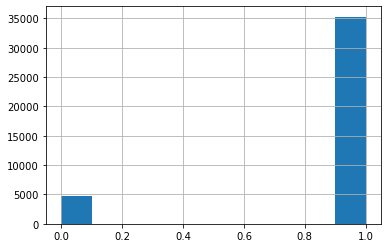

In [81]:
test(df, 'Net_rest')

Отметим, что сетевых ресторанов большинство (> 88%).

### City - город, в котором находится ресторан

In [82]:
test(df, 'City')

,City,percent
London,5757,14.3925
Paris,4897,12.2425
Madrid,3108,7.7700
Barcelona,2734,6.8350
Berlin,2155,5.3875
Milan,2133,5.3325
Rome,2078,5.1950
Prague,1443,3.6075
Lisbon,1300,3.2500
Vienna,1166,2.9150


Количество незаполненных значений: 0 ~ 0.0%.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   City    40000 non-null  object
dtypes: object(1)
memory usage: 312.6+ KB


Все значения заполнены. Пропусков нет. Грамматических ошибок и неточностей в названиях городов нет.

Сделаем из этой колонки dummy- переменные.

In [6]:
# удалить столбцы, содержащие данные типа object
# заполнить пропущенные значения нулём или средним арифметическим
#df1 = df.drop([col for col in df.columns if df[col].dtype == 'O'],axis=1)
df1 = df.drop(df.select_dtypes(include=['object']), axis = 1)
df1 = df1.fillna(df1.mean())
df1.head()

,Ranking,Rating,Number of Reviews
0,5570.0,3.5,194.0
1,1537.0,4.0,10.0
2,353.0,4.5,688.0
3,3458.0,5.0,3.0
4,621.0,4.0,84.0


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ranking            40000 non-null  float64
 1   Rating             40000 non-null  float64
 2   Number of Reviews  40000 non-null  float64
dtypes: float64(3)
memory usage: 937.6 KB


In [8]:
df['City'].dtype

dtype('O')

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [9]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df1.drop('Rating', axis = 1)
y = df1['Rating']

In [10]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [11]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [12]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [13]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [14]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.4292751246031747


In [136]:
df

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838
